In [51]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [52]:
font = {'family': 'serif',
    'color':  'darkred',
    'weight': 'normal',
    'size': 16,
    }

F = len("Jaromir")
L = len("Wegrzyn")
print("F = ", F)
print("L = ", L)

F =  7
L =  7


# Excercise 1 - Generated Quantities Block

### 1. Compile code_1.stan and sample from it using M=F

In [53]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [54]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


### 2. Create a pandas dataframe from resulting draws

In [55]:
dataframes = samples.draws_pd()
dataframes

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7]
0,0.0,0.0,228.8520,247.0,220.0,243.0,242.0,229.0,246.0,227.0
1,0.0,0.0,87.1339,73.0,90.0,80.0,101.0,83.0,95.0,84.0
2,0.0,0.0,30.5731,27.0,27.0,20.0,40.0,21.0,26.0,32.0
3,0.0,0.0,50.3127,49.0,58.0,57.0,59.0,54.0,44.0,54.0
4,0.0,0.0,106.2540,99.0,99.0,137.0,122.0,128.0,102.0,109.0
...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,34.8367,44.0,34.0,32.0,33.0,46.0,38.0,31.0
996,0.0,0.0,22.1941,19.0,19.0,24.0,18.0,19.0,19.0,12.0
997,0.0,0.0,136.5090,167.0,126.0,136.0,138.0,121.0,138.0,128.0
998,0.0,0.0,37.8489,43.0,46.0,44.0,45.0,24.0,41.0,34.0


### 3. Plot a histogram for each of y_sim and lambda

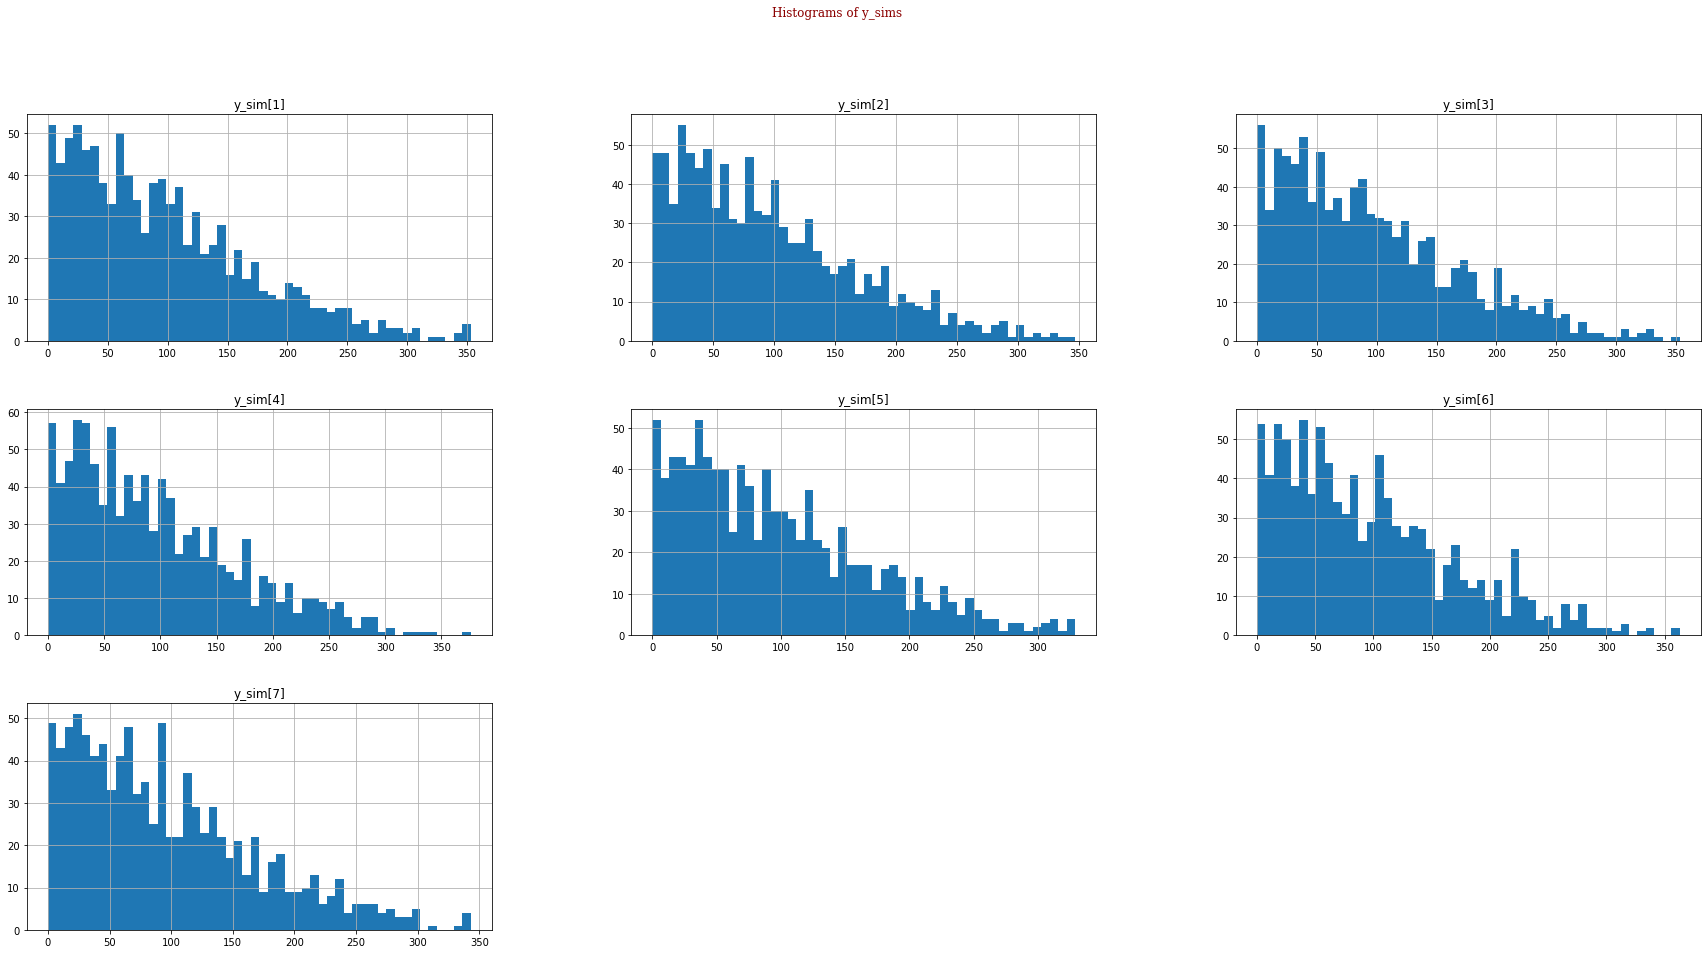

In [56]:
y_sims = dataframes[dataframes.columns[3:13]]
y_sims.hist(bins=50, figsize=(30, 15))
plt.suptitle("Histograms of y_sims", fontdict=font)
plt.show()

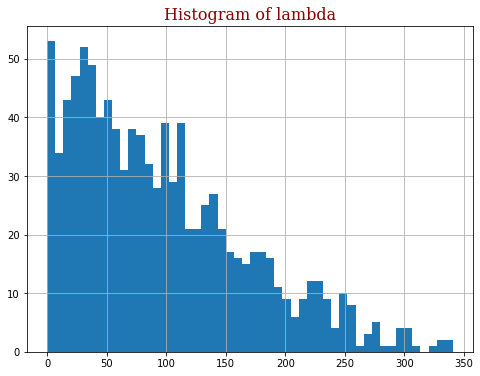

In [57]:
lambda_ = dataframes["lambda"]
# count, bins, ignored = plt.hist(lambda_, 50, density=False)
lambda_.hist(bins=50, figsize=(8, 6))
plt.title("Histogram of lambda", fontdict=font)
plt.show()

# Excercise 2 - Constraints on the data

### **Observation:**
### Error occured for y in range [0, 2]. After changed range to [0: 1] it works fine.

In [58]:
bern1 = CmdStanModel(stan_file='code_2.stan')
# samp_bern1 = bern1.sample(data={'N':2, 'y':[0,2]})
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


### **Observation:**
### Error occured for y in range [0, 2]. After changed range to [0: 1] it works fine.

In [59]:
bern2 = CmdStanModel(stan_file='code_3.stan')
# samp_bern2 = bern2.sample(data={'N':2, 'y':[0,2]})
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


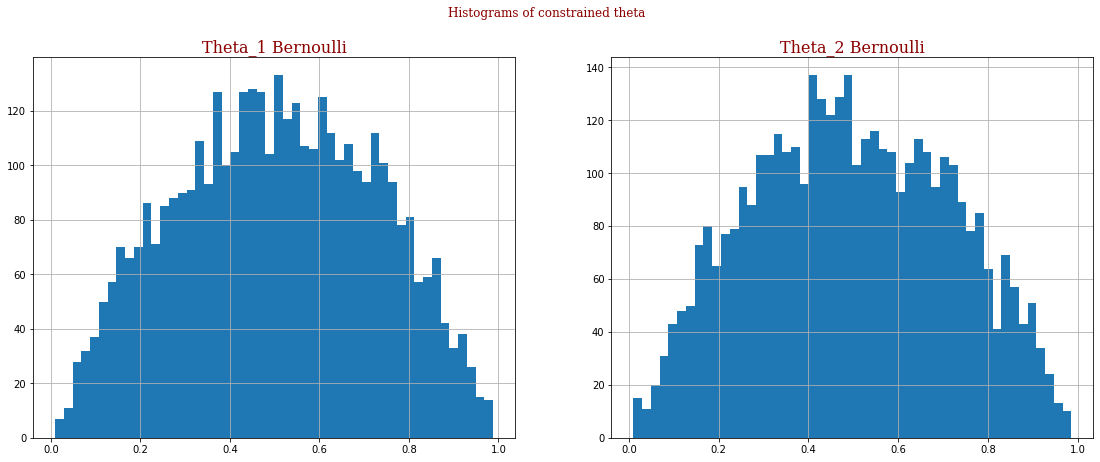

In [60]:
# theta_bern_1 = samp_bern1.stan_variable("theta")
# dataframe_ = pd.DataFrame({'theta_bern_1': theta_bern_1})
# dataframe_.hist(bins=50, figsize=(8,6))
# plt.show()

dataframe_1 = samp_bern1.draws_pd()
dataframe_2 = samp_bern2.draws_pd()

theta_1 = dataframe_1["theta"]
theta_2 = dataframe_2["theta"]

plt.figure(figsize=(19,7))
plt.subplot(1,2,1)
count, bins, ignored = plt.hist(theta_1, 50, density=False)
plt.title("Theta_1 Bernoulli", fontdict=font)
plt.grid(True)

plt.subplot(1,2,2)
count, bins, ignored = plt.hist(theta_2, 50, density=False)
plt.title(f'Theta_2 Bernoulli', fontdict=font)
plt.suptitle("Histograms of constrained theta", fontdict=font)
plt.grid(True)
plt.show()

# Excercise 3 - Constraints on parameters

## Unconstrained parameters

In [61]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/DA_Volume/AD2023_930/Lab_02/samples/code_4-20230329201255_1.csv, /home/DA_Volume/AD2023_930/Lab_02/samples/code_4-20230329201255_2.csv, /home/DA_Volume/AD2023_930/Lab_02/samples/code_4-20230329201255_3.csv, /home/DA_Volume/AD2023_930/Lab_02/samples/code_4-20230329201255_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

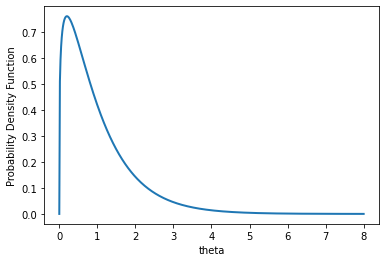

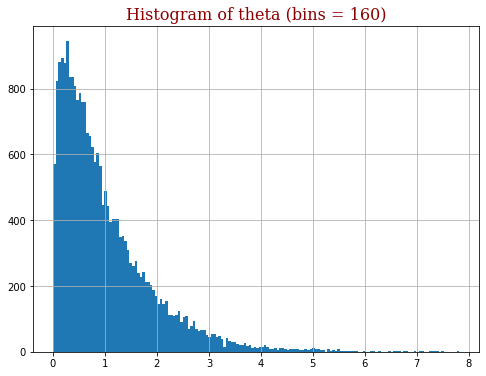

In [62]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## add histogram of theta samples with 160 bins
theta_ = out_gamma1.stan_variable('theta')
dataframe_ = pd.DataFrame({'theta': theta_})
dataframe_.hist(bins=160, figsize=(8,6))
plt.title("Histogram of theta (bins = 160)", fontdict=font)
plt.show()


# dataframe_theta = out_gamma1.draws_pd()
# theta = dataframe_theta["theta"]

# theta.hist(bins=160, figsize=(8, 6))
# plt.title("Histogram of theta (bins = 160)", fontdict=font)
# plt.show()

### **Diagnostic message from code_4**
**Rejecting initial value:**<br>
<i>Log probability evaluates to log(0), i.e. negative infinity.
Stan can't start sampling from this initial value.<br>
The histogram is similar to a probabilistic distribution. Negative samples of theta are cut off.<br></i>

## Constrained parameter

In [63]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/DA_Volume/AD2023_930/Lab_02/samples/code_5-20230329201300_1.csv, /home/DA_Volume/AD2023_930/Lab_02/samples/code_5-20230329201300_2.csv, /home/DA_Volume/AD2023_930/Lab_02/samples/code_5-20230329201300_3.csv, /home/DA_Volume/AD2023_930/Lab_02/samples/code_5-20230329201300_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

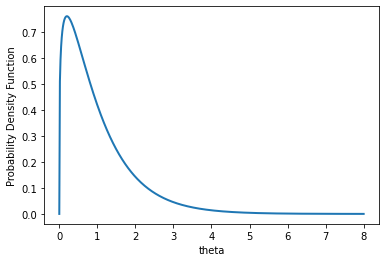

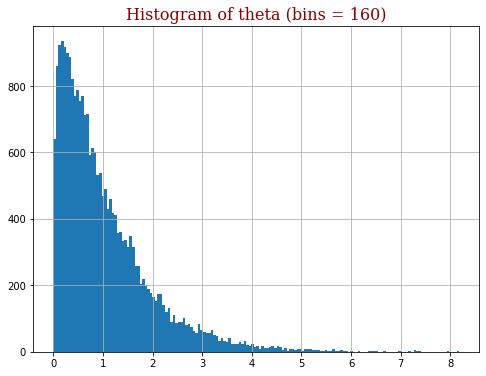

In [64]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## add histogram of theta samples from the second model with 160 bins
# theta_ = out_gamma2.stan_variable('theta')
# dataframe_ = pd.DataFrame({'theta': theta_})
# dataframe_.hist(bins=160, figsize=(8,6))
# plt.title("Histogram of theta (bins = 160)", fontdict=font)
# plt.show()

dataframe_theta = out_gamma2.draws_pd()
theta = dataframe_theta["theta"]

theta.hist(bins=160, figsize=(8, 6))
plt.title("Histogram of theta (bins = 160)", fontdict=font)
plt.show()

<i>The diagnostic message did not appear. The histogram is almost the same as previous.</i>

# Excercise 4 - Selection of parameters using equation solving

In [65]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = len("Jaromir") # number of letters in the first name
L = len("Wegrzyn") # number of letters in the last name

y0 = 0.8 # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

tunes_ = tunes.draws_pd(["sigma"])
print("Standard deviation of half_normal distribution: ")
tunes_

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Standard deviation of half_normal distribution: 


,sigma
0,2.71757


# Excercise 5 - different methods of defining models

In [66]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 2222000#integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


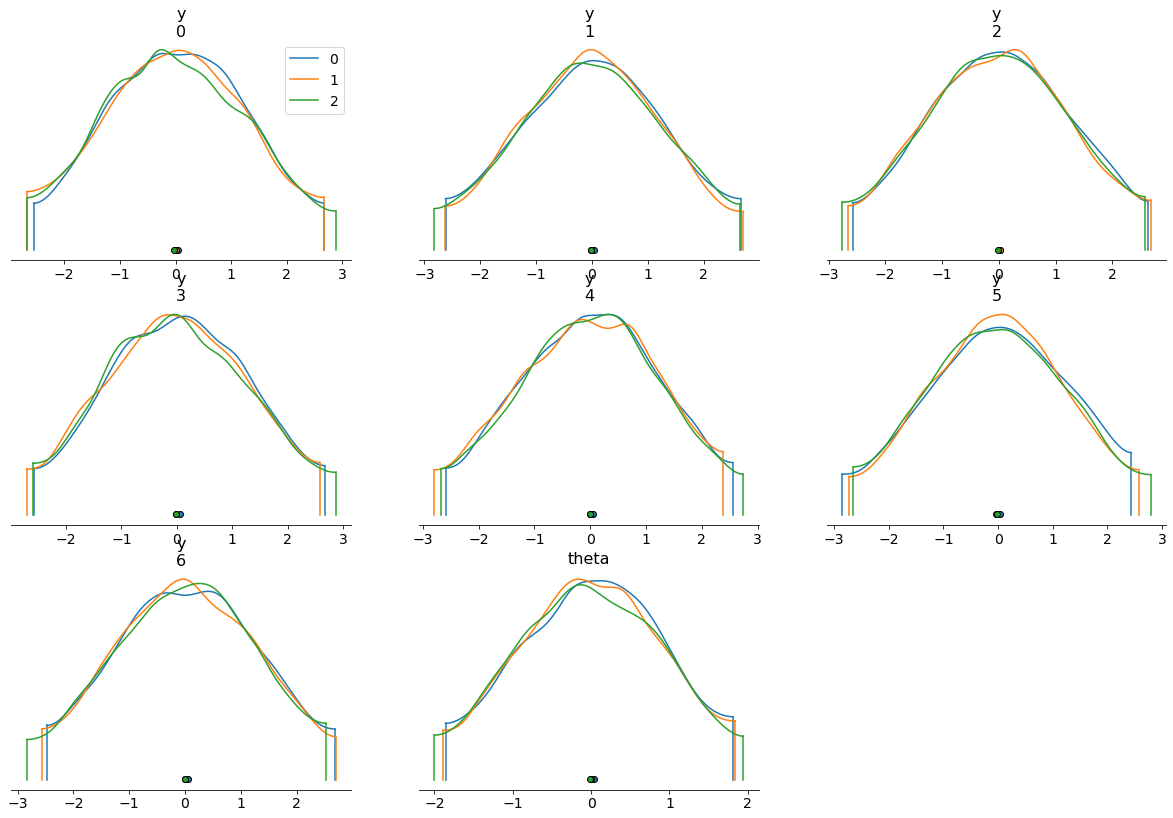

In [67]:
az.plot_density([result_1,result_2,result_3])
plt.show()

# Excercise 6 - generated quantities post sampling

In [68]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)
# investigate the output and plot histogram of mean_y variable
dataframe_mean= mean_of_y.draws_pd()
dataframe_mean

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [4] done processing


,mean_y
0,-1.589540
1,-0.519715
2,-1.302280
3,-0.950618
4,1.923590
...,...
3995,0.694245
3996,0.879744
3997,0.775531
3998,2.710350


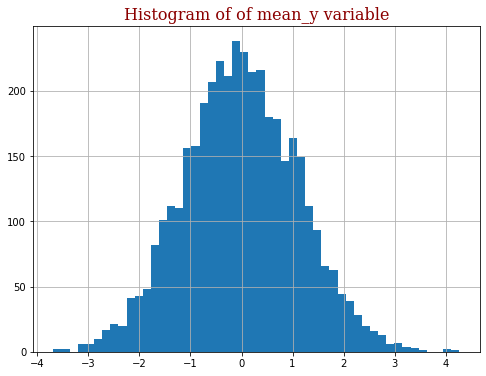

In [69]:
dataframe_mean.hist(bins=50, figsize=(8, 6))
plt.title("Histogram of of mean_y variable", fontdict=font)
plt.show()